<a href="https://colab.research.google.com/github/PPM5658/DeepGrid-Predictive-Load-Analytics-for-Smart-Grid-Optimization/blob/main/Smart_grid_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
ziya07_smart_grid_real_time_load_monitoring_dataset_path = kagglehub.dataset_download('ziya07/smart-grid-real-time-load-monitoring-dataset')
print('Data source import complete.')

Using Colab cache for faster access to the 'smart-grid-real-time-load-monitoring-dataset' dataset.
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed

# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os

file_path=''

for dirname, _, filenames in os.walk('/kaggle/input'):

    for filename in filenames:

        file_path=os.path.join(dirname, filename)
        print(file_path)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smart-grid-real-time-load-monitoring-dataset/smart_grid_dataset.csv


In [ ]:
file_path

'/kaggle/input/smart-grid-real-time-load-monitoring-dataset/smart_grid_dataset.csv'

In [ ]:
df=pd.read_csv("/kaggle/input/smart-grid-real-time-load-monitoring-dataset/smart_grid_dataset.csv")
df

,Timestamp,Voltage (V),Current (A),Power Consumption (kW),Reactive Power (kVAR),Power Factor,Solar Power (kW),Wind Power (kW),Grid Supply (kW),Voltage Fluctuation (%),Overload Condition,Transformer Fault,Temperature (°C),Humidity (%),Electricity Price (USD/kWh),Predicted Load (kW)
0,2024-01-01 00:00:00,232.483571,5.124673,1.191402,0.399029,0.907766,46.614845,26.399566,0.000000,1.055937,0,0,17.842767,64.523353,0.416156,1.233158
1,2024-01-01 00:15:00,229.308678,22.213519,5.093753,1.248030,0.831813,6.907170,18.555011,0.000000,-3.910902,1,0,18.753698,49.671940,0.492334,5.247824
2,2024-01-01 00:30:00,233.238443,46.132217,10.759806,2.790464,0.999005,15.477640,12.905025,0.000000,-0.197551,0,0,16.719325,48.472769,0.427785,10.580278
3,2024-01-01 00:45:00,237.615149,47.648972,11.322118,1.956965,0.896462,35.746398,28.937129,0.000000,2.671921,0,0,15.364564,75.766776,0.487953,11.225946
4,2024-01-01 01:00:00,228.829233,7.410166,1.695663,0.624718,0.870681,27.555038,14.184648,0.000000,3.826937,0,0,38.760333,61.384213,0.290078,1.696639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2025-06-04 18:45:00,230.283995,34.885717,8.033622,1.412623,0.958675,3.846010,3.773607,0.414005,2.032808,0,0,17.569583,65.013656,0.445045,7.866108
49996,2025-06-04 19:00:00,229.875386,7.380088,1.696501,0.308268,0.907014,16.522504,10.832262,0.000000,-3.274382,0,0,31.907835,25.049143,0.342882,1.753542
49997,2025-06-04 19:15:00,232.500424,43.166952,10.036335,1.631748,0.913899,37.235774,12.475871,0.000000,1.810338,1,0,12.606985,62.469951,0.215314,9.947611
49998,2025-06-04 19:30:00,231.326077,46.254150,10.699791,1.712672,0.948393,22.098785,1.512796,0.000000,1.500918,0,0,26.773676,58.100487,0.147162,10.886454


In [ ]:
df.columns

Index(['Timestamp', 'Voltage (V)', 'Current (A)', 'Power Consumption (kW)',
       'Reactive Power (kVAR)', 'Power Factor', 'Solar Power (kW)',
       'Wind Power (kW)', 'Grid Supply (kW)', 'Voltage Fluctuation (%)',
       'Overload Condition', 'Transformer Fault', 'Temperature (°C)',
       'Humidity (%)', 'Electricity Price (USD/kWh)', 'Predicted Load (kW)'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Timestamp                    50000 non-null  object 
 1   Voltage (V)                  50000 non-null  float64
 2   Current (A)                  50000 non-null  float64
 3   Power Consumption (kW)       50000 non-null  float64
 4   Reactive Power (kVAR)        50000 non-null  float64
 5   Power Factor                 50000 non-null  float64
 6   Solar Power (kW)             50000 non-null  float64
 7   Wind Power (kW)              50000 non-null  float64
 8   Grid Supply (kW)             50000 non-null  float64
 9   Voltage Fluctuation (%)      50000 non-null  float64
 10  Overload Condition           50000 non-null  int64  
 11  Transformer Fault            50000 non-null  int64  
 12  Temperature (°C)             50000 non-null  float64
 13  Humidity (%)    

In [ ]:
df.isnull().sum()

,0
Timestamp,0
Voltage (V),0
Current (A),0
Power Consumption (kW),0
Reactive Power (kVAR),0
Power Factor,0
Solar Power (kW),0
Wind Power (kW),0
Grid Supply (kW),0
Voltage Fluctuation (%),0


In [ ]:
df.describe()

,Voltage (V),Current (A),Power Consumption (kW),Reactive Power (kVAR),Power Factor,Solar Power (kW),Wind Power (kW),Grid Supply (kW),Voltage Fluctuation (%),Overload Condition,Transformer Fault,Temperature (°C),Humidity (%),Electricity Price (USD/kWh),Predicted Load (kW)
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,229.997896,27.482627,6.320811,1.584137,0.899997,25.075357,15.008312,0.047198,-0.002723,0.099120,0.029200,25.019338,50.092434,0.299095,6.320693
std,5.000849,12.984307,2.990096,0.964876,0.057740,14.434644,8.663070,0.460281,2.884219,0.298826,0.168368,8.657092,17.263387,0.115495,2.997199
min,207.671981,5.001239,1.089178,0.113665,0.800001,0.000115,0.000067,0.000000,-4.999913,0.000000,0.000000,10.000016,20.000423,0.100002,1.043487
25%,226.606874,16.144764,3.706998,0.805235,0.849930,12.597064,7.495573,0.000000,-2.506506,0.000000,0.000000,17.483315,35.271140,0.198925,3.711469
50%,230.008697,27.580058,6.340475,1.386541,0.900119,25.031922,15.035654,0.000000,-0.009397,0.000000,0.000000,25.052471,49.998822,0.298936,6.328723
75%,233.385302,38.778588,8.914134,2.209433,0.949748,37.527215,22.528948,0.000000,2.493917,0.000000,0.000000,32.541626,65.017934,0.398642,8.910125
max,252.395421,49.999642,12.103199,4.684119,0.999997,49.998963,29.997815,10.766046,4.999946,1.000000,1.000000,39.999949,79.997923,0.499996,12.483253


In [ ]:
def validation_grid_data(df):
  constraints={
      'Voltage (V)':(180,260),
      'Power Factor' :(0,1),
      'Electricity Price (USD/kWh)': (0, 10), # No negative prices
      'Humidity (%)': (0, 100)        # Physical limit
  }
  for col,(min,max) in constraints.items():
    outliers=df[(df[col]<min) | df[col]>max]
    if not outliers.empty:
      print(f"ALERT: Found {len(outliers)} rows with invalid {col}. Removing...")
      df = df.drop(outliers.index)

    return df

In [ ]:
validated_df=validation_grid_data(df)

In [ ]:
def apply_cyclic_encoding(df):
    # Ensure Timestamp is datetime
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['Hour'] = df['Timestamp'].dt.hour

    # Map to 2*PI circle
    df['hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

    print("Cyclic encoding complete. Models can now see time continuity.")
    return df
new_df=apply_cyclic_encoding(validated_df)

Cyclic encoding complete. Models can now see time continuity.


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Timestamp                    50000 non-null  datetime64[ns]
 1   Voltage (V)                  50000 non-null  float64       
 2   Current (A)                  50000 non-null  float64       
 3   Power Consumption (kW)       50000 non-null  float64       
 4   Reactive Power (kVAR)        50000 non-null  float64       
 5   Power Factor                 50000 non-null  float64       
 6   Solar Power (kW)             50000 non-null  float64       
 7   Wind Power (kW)              50000 non-null  float64       
 8   Grid Supply (kW)             50000 non-null  float64       
 9   Voltage Fluctuation (%)      50000 non-null  float64       
 10  Overload Condition           50000 non-null  int64         
 11  Transformer Fault            50000 non-nu

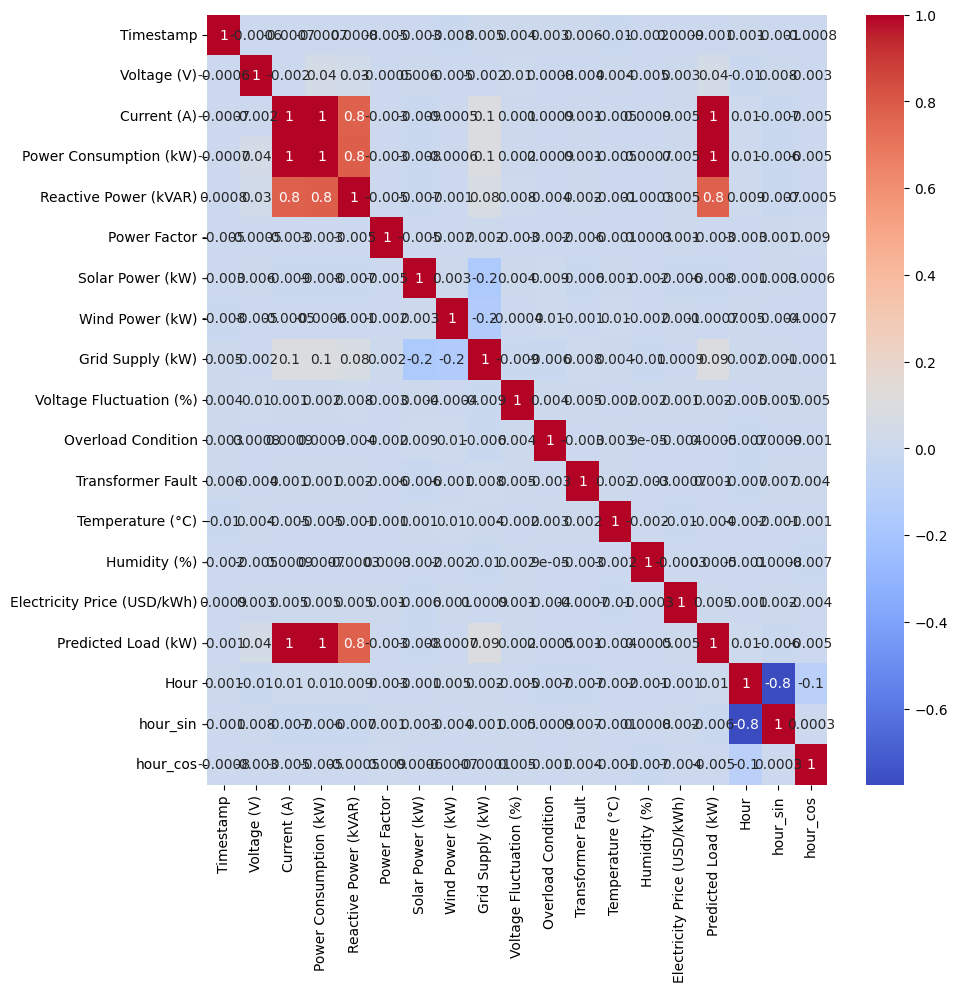

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corre=new_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corre,cmap='coolwarm',fmt='.1g',annot=True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

def train_base_model(df):
    features = ['Voltage (V)', 'Temperature (°C)', 'Humidity (%)', 'hour_sin', 'hour_cos']
    target = 'Power Consumption (kW)'
    split_idx = int(len(new_df) * 0.8)
    train_df = new_df.iloc[:split_idx]
    test_df = new_df.iloc[split_idx:]

    X_train, y_train = train_df[features], train_df[target]
    X_test, y_test = test_df[features], test_df[target]
    base_model = RandomForestRegressor(n_estimators=100,
                                       criterion='squared_error'
                                       ,random_state=42)
    base_model.fit(X_train, y_train)
    new_df['base_prediction'] = base_model.predict(new_df[features])
    print("Base Model trained and predictions stored in 'base_prediction' column.")
    return new_df, base_model
predicteddf, my_base_model = train_base_model(new_df)

Base Model trained and predictions stored in 'base_prediction' column.


In [ ]:
# Calculate the mean absolute error
mae = (predicteddf['Power Consumption (kW)'] - predicteddf['base_prediction']).abs().mean()
print(f"Base Model Average Error: {mae:.2f} kW")

Base Model Average Error: 1.31 kW


In [ ]:
predicteddf['raw_error']=predicteddf['Power Consumption (kW)']-predicteddf['base_prediction']

In [ ]:
def create_1h_awareness(df):
  df['error_1h_lag']=df['raw_error'].shift(1)
  threshold=1.0
  df['is_accurate_1h']=df['error_1h_lag'].apply(
      lambda x: 0 if abs(x) <= threshold else x
  )
  return df

In [ ]:
def create_24h_awareness(df):
  df['error_24h_lag']=df['raw_error'].shift(24)
  threshold=1.0
  df['is_accurate_24h']=df['error_24h_lag'].apply(
      lambda x: 0 if abs(x) <= threshold else x
  )
  df = df.dropna()
  return df

In [ ]:
df=create_1h_awareness(predicteddf)
df=create_24h_awareness(predicteddf)

In [ ]:
df[['Power Consumption (kW)','raw_error','error_1h_lag','is_accurate_1h','error_24h_lag','is_accurate_24h']].head(30)

,Power Consumption (kW),raw_error,error_1h_lag,is_accurate_1h,error_24h_lag,is_accurate_24h
24,8.343665,0.636423,1.780918,1.780918,-1.890424,-1.890424
25,8.295982,0.810281,0.636423,0.000000,-0.478788,0.000000
26,7.783850,0.814119,0.810281,0.000000,1.320704,1.320704
27,2.493009,-1.789051,0.814119,0.000000,1.985381,1.985381
28,1.176689,-1.882947,-1.789051,-1.789051,-1.336278,-1.336278
29,5.674539,-0.527699,-1.882947,-1.882947,-1.130622,-1.130622
30,5.673561,-0.225524,-0.527699,0.000000,-2.509811,-2.509811
31,9.936824,1.582539,-0.225524,0.000000,1.370590,1.370590
32,3.028335,-1.858744,1.582539,1.582539,-1.394778,-1.394778
33,3.905485,-0.540635,-1.858744,-1.858744,-1.554631,-1.554631


In [ ]:
yesterday=df.iloc[10]
today=df.iloc[10+24]
print(f"Yesterday Power Consumption: {yesterday['raw_error']}")
print(f"Today Power Consumption : {today['error_24h_lag']}")
print(f'{"Accurate" if yesterday['raw_error'] == today['error_24h_lag'] else "Inaccurate"}')

Yesterday Power Consumption: -1.5541181063081702
Today Power Consumption : -1.5541181063081702
Accurate


In [ ]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.7/131.7 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.8/289.8 MB 1.4 MB/s eta 0:00:00


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error,explained_variance_score,roc_auc_score,accuracy_score

In [ ]:

# # # The original features
# # final_features = ['Voltage (V)', 'Temperature (°C)', 'Humidity (%)', 'hour_sin', 'hour_cos','error_1h_lag', 'is_accurate_1h', 'error_24h_lag', 'is_accurate_24h']
# # def train_aware_model_xgboost(df):
# #   target='Power Consumption (kW)'
# #   split_idx=int(len(df)*0.8)
# #   train_df=df.iloc[:split_idx].copy() # Explicitly create a copy
# #   test_df=df.iloc[split_idx:].copy() # Explicitly create a copy
# #   X_train,y_train=train_df[final_features],train_df[target]
# #   X_test,y_test=test_df[final_features],test_df[target]
# #   aware_model=xgb.XGBRegressor(
# #       n_estimators=1000,
# #       learning_rate=0.05,
# #       max_depth=5,
# #       early_stopping_rounds=50,
# #       random_state=42
# #       )
# #   aware_model.fit(X_train,y_train,eval_set=[(X_test,y_test)],verbose=False)
# #   # Use .loc for explicit assignment to avoid SettingWithCopyWarning
# #   df.loc[:, 'aware_prediction'] = aware_model.predict(df[final_features])
# #   return df,aware_model
# # new_df,xgb_model=train_aware_model_xgboost(df)
# split_idx=int(len(new_df)*0.8)
# test_data=new_df.iloc[split_idx:]
# base_mae=mean_absolute_error(test_data['Power Consumption (kW)'],test_data['base_prediction'])
# aware_mae=mean_absolute_error(test_data['Power Consumption (kW)'],test_data['aware_prediction'])
# print(f"Base Model MAE: {base_mae:.4f} kW")
# print(f"Aware Model (XGBoost) MAE: {aware_mae:.4f} kW")
# print(f"Improvement: {((base_mae - aware_mae) / base_mae) * 100:.2f}%")

In [ ]:
# 1. Define final feature set
final_features = ['Voltage (V)', 'Temperature (°C)', 'Humidity (%)', 'hour_sin', 'hour_cos',
                  'error_1h_lag', 'is_accurate_1h', 'error_24h_lag', 'is_accurate_24h']
target = 'Power Consumption (kW)'

# 2. Chronological Split
split_idx = int(len(df) * 0.8)
train_df = df.iloc[:split_idx].copy() # Explicitly create a copy
test_df = df.iloc[split_idx:].copy() # Explicitly create a copy

# 3. Initialize XGBoost with industry-standard parameters
aware_xgb = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# 4. Fit the model
aware_xgb.fit(train_df[final_features], train_df[target])

# 5. Generate New Predictions
# Use .loc for explicit assignment to avoid SettingWithCopyWarning
df.loc[:, 'aware_prediction'] = aware_xgb.predict(df[final_features])

/tmp/ipython-input-714933971.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'aware_prediction'] = aware_xgb.predict(df[final_features])


In [ ]:
# Select only the test set for a fair comparison
test_results = df.iloc[split_idx:].copy()

metrics = {
    'Model': ['Base Model', 'Aware XGBoost'],
    'MAE (Lower is better)': [
        mean_absolute_error(test_results['Power Consumption (kW)'], test_results['base_prediction']),
        mean_absolute_error(test_results['Power Consumption (kW)'], test_results['aware_prediction'])
    ],
    'R2 Score (Higher is better)': [
        r2_score(test_results['Power Consumption (kW)'], test_results['base_prediction']),
        r2_score(test_results['Power Consumption (kW)'], test_results['aware_prediction'])
    ]
}

performance_table = pd.DataFrame(metrics)
print(performance_table)

           Model  MAE (Lower is better)  R2 Score (Higher is better)
0     Base Model               2.653975                    -0.062695
1  Aware XGBoost               2.713500                    -0.129096


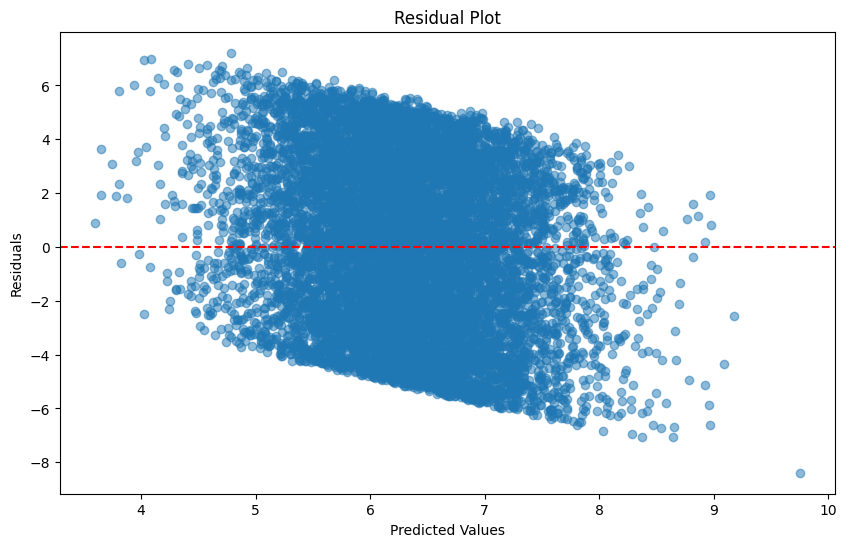

In [ ]:
residual=test_df['Power Consumption (kW)']-test_df['base_prediction']
plt.figure(figsize=(10,6))
plt.scatter(test_df['base_prediction'],residual,alpha=0.5)
plt.axhline(y=0,color='r',linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
test_results.columns

Index(['Timestamp', 'Voltage (V)', 'Current (A)', 'Power Consumption (kW)',
       'Reactive Power (kVAR)', 'Power Factor', 'Solar Power (kW)',
       'Wind Power (kW)', 'Grid Supply (kW)', 'Voltage Fluctuation (%)',
       'Overload Condition', 'Transformer Fault', 'Temperature (°C)',
       'Humidity (%)', 'Electricity Price (USD/kWh)', 'Predicted Load (kW)',
       'Hour', 'hour_sin', 'hour_cos', 'base_prediction', 'raw_error',
       'error_1h_lag', 'is_accurate_1h', 'error_24h_lag', 'is_accurate_24h',
       'aware_prediction'],
      dtype='object')

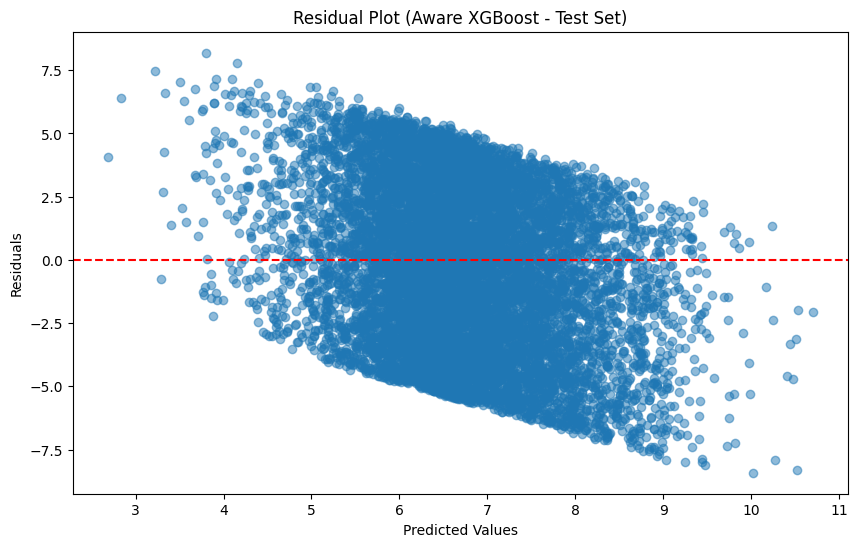

In [ ]:
residual=test_results['Power Consumption (kW)']-test_results['aware_prediction']
plt.figure(figsize=(10,6))
plt.scatter(test_results['aware_prediction'],residual,alpha=0.5)
plt.axhline(y=0,color='r',linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Aware XGBoost - Test Set)')
plt.show()

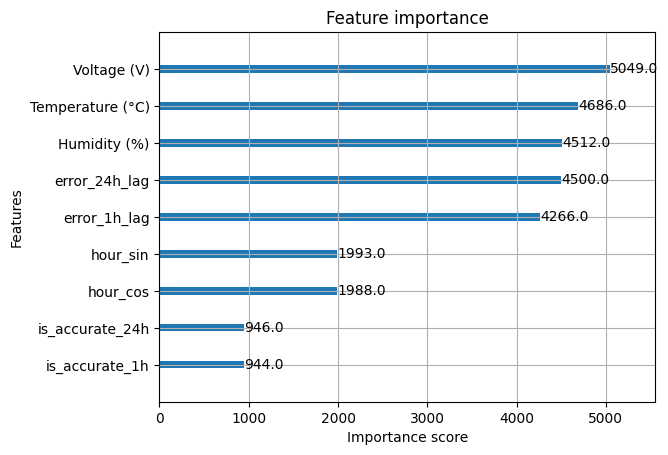

In [ ]:
# See if the model actually 'listened' to your awareness columns
xgb.plot_importance(aware_xgb)
plt.show()

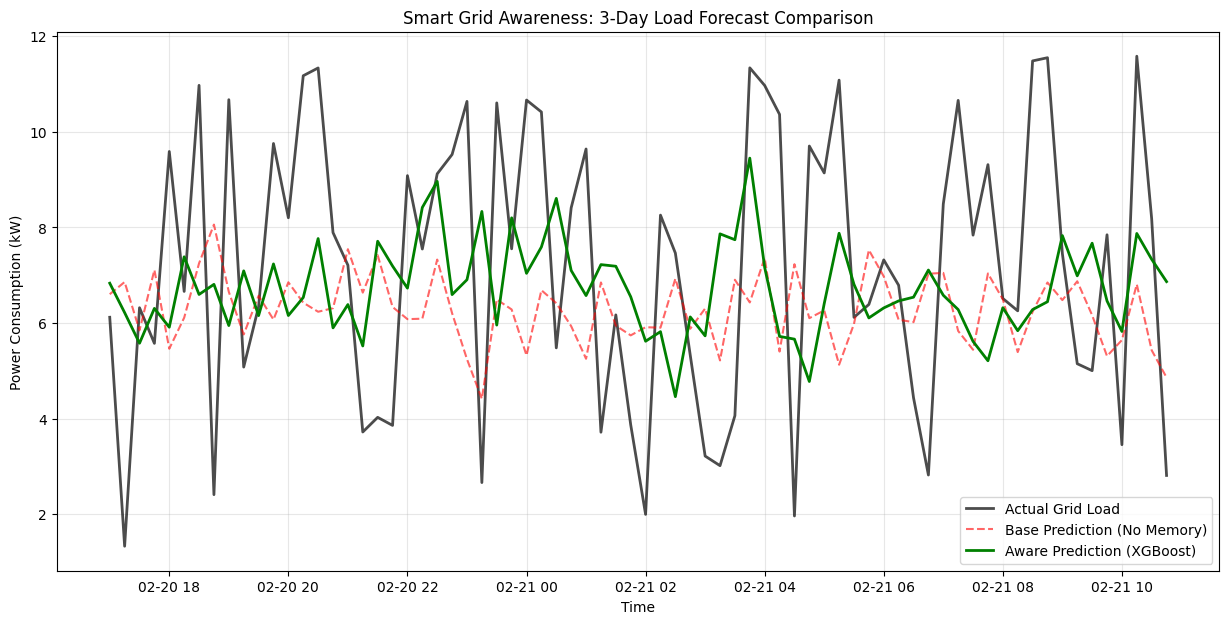

In [ ]:
import matplotlib.pyplot as plt

def plot_aware_comparison(df, start_idx, days=3):
    # Calculate number of rows (assuming hourly data)
    end_idx = start_idx + (days * 24)
    plot_df = df.iloc[start_idx:end_idx].copy()

    plt.figure(figsize=(15, 7))

    # 1. Plot Actual Data
    plt.plot(plot_df['Timestamp'], plot_df['Power Consumption (kW)'],
             label='Actual Grid Load', color='black', linewidth=2, alpha=0.7)

    # 2. Plot Base Model (The 'Dumb' Model)
    plt.plot(plot_df['Timestamp'], plot_df['base_prediction'],
             label='Base Prediction (No Memory)', color='red', linestyle='--', alpha=0.6)

    # 3. Plot Aware XGBoost (The 'Smart' Model)
    plt.plot(plot_df['Timestamp'], plot_df['aware_prediction'],
             label='Aware Prediction (XGBoost)', color='green', linewidth=2)

    plt.title(f'Smart Grid Awareness: 3-Day Load Forecast Comparison')
    plt.xlabel('Time')
    plt.ylabel('Power Consumption (kW)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Run the plot for the first 3 days of your test set
split_idx = int(len(df) * 0.8)
plot_aware_comparison(df, start_idx=split_idx)

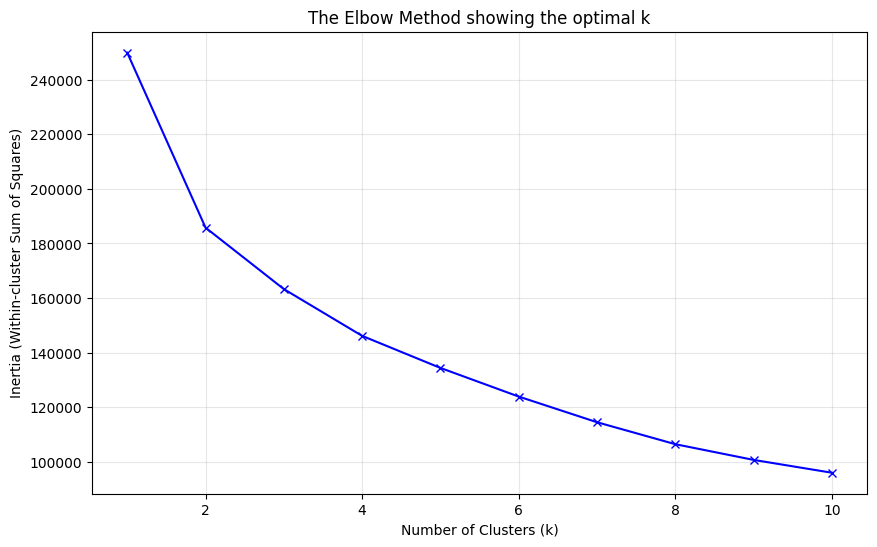

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def find_optimal_clusters(df, features):
    # 1. Scale the data (Clustering requires normalized features)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[features])

    # 2. Calculate inertia for 1 to 10 clusters
    inertia = []
    K = range(1, 11)
    for k in K:
        kmeanModel = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeanModel.fit(scaled_data)
        inertia.append(kmeanModel.inertia_)

    # 3. Plot the Elbow
    plt.figure(figsize=(10, 6))
    plt.plot(K, inertia, 'bx-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (Within-cluster Sum of Squares)')
    plt.title('The Elbow Method showing the optimal k')
    plt.grid(True, alpha=0.3)
    plt.show()

# Features that define a "Grid State"
cluster_features = [
    'Power Consumption (kW)',
    'Voltage (V)',
    'Temperature (°C)',
    'Humidity (%)',
    'Reactive Power (kVAR)'
]

find_optimal_clusters(df, cluster_features)

/tmp/ipython-input-2103889246.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grid_cluster'] = kmeans.fit_predict(scaled_data)
/tmp/ipython-input-2103889246.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pca_1'] = pca_result[:, 0]
/tmp/ipython-input-2103889246.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

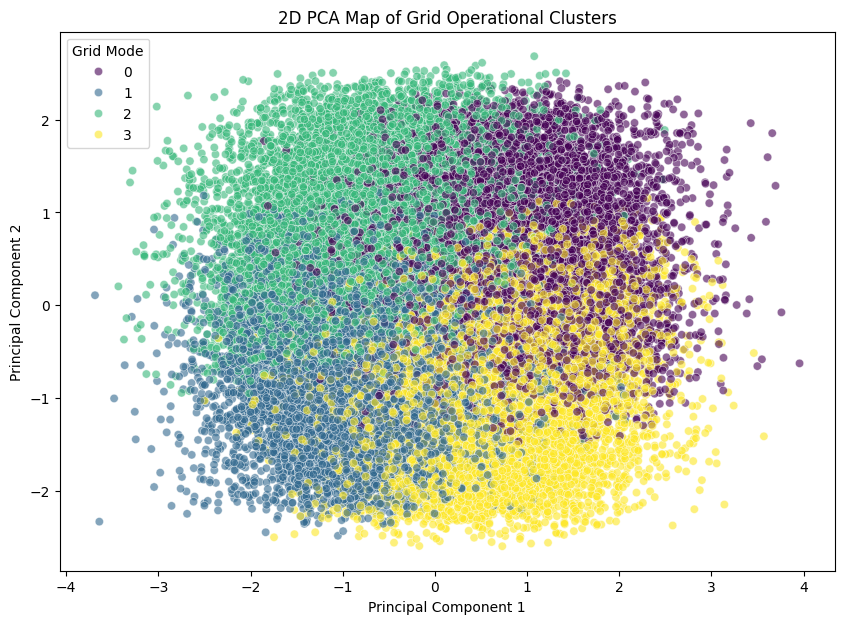

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def execute_grid_clustering(df, features, k=4):
    # 1. Scale data for clustering
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[features])
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    df['grid_cluster'] = kmeans.fit_predict(scaled_data)

    # 3. PCA for Visualization (Reduce to 2 dimensions)
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_data)
    df['pca_1'] = pca_result[:, 0]
    df['pca_2'] = pca_result[:, 1]

    return df, kmeans

# Use the features we discussed
features = ['Power Consumption (kW)', 'Voltage (V)', 'Temperature (°C)', 'Humidity (%)']
df, kmeans_model = execute_grid_clustering(df, features, k=4)
plt.figure(figsize=(10, 7))
sns.scatterplot(x='pca_1', y='pca_2', hue='grid_cluster', data=df, palette='viridis', alpha=0.6)
plt.title('2D PCA Map of Grid Operational Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Grid Mode')
plt.show()

In [ ]:
df['grid_cluster'].value_counts()

,count
grid_cluster,
2,12598
1,12494
0,12486
3,12398


In [ ]:
# Create a summary table of the means for each cluster
cluster_profiles = df.groupby('grid_cluster')[
    ['Power Consumption (kW)', 'Voltage (V)', 'Temperature (°C)', 'Humidity (%)']
].mean().sort_values(by='Power Consumption (kW)')

print("--- Cluster Operational Profiles ---")
display(cluster_profiles)

--- Cluster Operational Profiles ---


,Power Consumption (kW),Voltage (V),Temperature (°C),Humidity (%)
grid_cluster,,,,
2,3.891504,229.674937,33.277272,50.243211
1,3.905250,229.424730,16.789907,49.945544
0,8.761591,230.650631,25.080214,33.748031
3,8.766101,230.247724,24.861257,66.550131


/tmp/ipython-input-3030929323.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='grid_cluster', y='Power Consumption (kW)', data=df, palette='viridis')


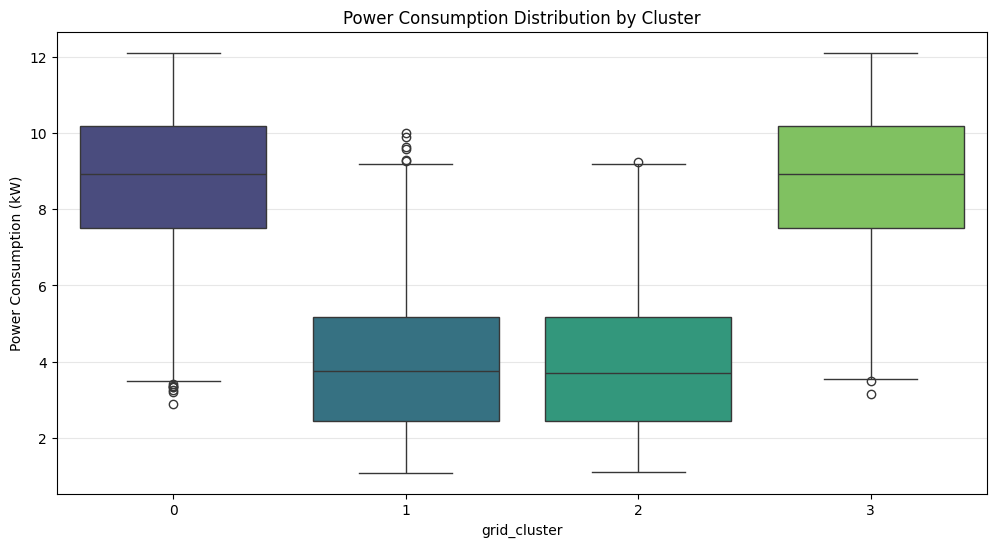

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='grid_cluster', y='Power Consumption (kW)', data=df, palette='viridis')
plt.title('Power Consumption Distribution by Cluster')

plt.grid(axis='y', alpha=0.3)
plt.show()

**Cluster 0:** The "High Stability" Peak
Behavior: This cluster represents consistently high power usage, typically ranging between 8kW and 10kW.

**Characteristics:** Notice the very "tight" box in the plot; this means the grid is in a steady, high-demand state with very few surprises or fluctuations.

**Grid Context:** This likely represents heavy commercial hours or consistent industrial activity where the load is high but predictable.


---


**Cluster 1**: The "Economy/Night" Mode
Behavior: Low power consumption, with a median around 4kW.

**Characteristics**: It has the lowest minimum values in your dataset (dropping near 1kW). The "outliers" (dots above the top whisker) suggest sudden, brief spikes in an otherwise quiet period.

**Grid Context**: Typical for late-night or early-morning residential cycles when most appliances are off.


---


**Cluster 2**: The "Variable Low" Mode
Behavior: Very similar consumption levels to Cluster 1, but with a slightly wider distribution.

**Characteristics**: While the median is low, the whiskers extend further, showing more variability in demand than Cluster 1.

**Grid Context**: This likely represents "Transition" periods—early mornings or late evenings when the grid is shifting between states.


---


**Cluster 3**: The "Extreme Peak" / Heavy Stress
Behavior: This is your highest demand cluster, reaching up to 12kW.

**Characteristics**: It has the highest median and the largest vertical spread. This is where your Phase 1 Awareness columns are doing the most work, as this mode is the most volatile.

**Grid Context**: This represents "Heatwave" peaks or maximum capacity events where HVAC or heavy machinery is running at full tilt.

In [ ]:
test_df=df.iloc[split_idx:].copy()

test_df['abs_error']=(test_df['Power Consumption (kW)'] - test_df['aware_prediction']).abs()

cluster_accuracy = test_df.groupby('grid_cluster')['abs_error'].mean().reset_index()

cluster_accuracy.columns = ['Grid Mode', 'MAE (kW)']

print(cluster_accuracy)

   Grid Mode  MAE (kW)
0          0  2.456023
1          1  3.000475
2          2  2.976866
3          3  2.415136


/tmp/ipython-input-3449991686.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='grid_cluster', y='raw_error', data=df.iloc[split_idx:], palette='muted')


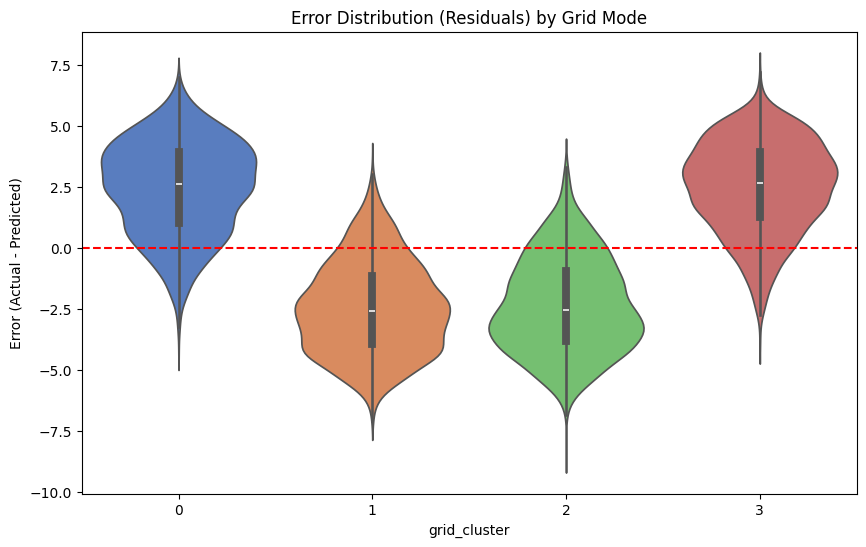

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='grid_cluster', y='raw_error', data=df.iloc[split_idx:], palette='muted')
plt.axhline(0, color='red', linestyle='--')
plt.title('Error Distribution (Residuals) by Grid Mode')
plt.ylabel('Error (Actual - Predicted)')
plt.show()

In [ ]:
def extract_grid_anomalies(df, top_n=10):
    # Calculate error for the entire dataset
    df['abs_error'] = (df['Power Consumption (kW)'] - df['aware_prediction']).abs()
    # Sort by error descending
    anomalies = df.sort_values(by='abs_error', ascending=False).head(top_n)
    # Select key columns for inspection
    report_cols = ['Timestamp', 'Power Consumption (kW)', 'aware_prediction',
                   'abs_error', 'grid_cluster', 'Voltage (V)', 'Temperature (°C)']
    return anomalies[report_cols]

top_anomalies = extract_grid_anomalies(df)
print("--- Top 10 Grid Anomalies ---")
display(top_anomalies)

--- Top 10 Grid Anomalies ---


/tmp/ipython-input-268593482.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abs_error'] = (df['Power Consumption (kW)'] - df['aware_prediction']).abs()


,Timestamp,Power Consumption (kW),aware_prediction,abs_error,grid_cluster,Voltage (V),Temperature (°C)
43589,2025-03-30 01:15:00,1.609897,10.024990,8.415093,1,227.002307,16.727041
42625,2025-03-20 00:15:00,2.217136,10.527072,8.309936,1,239.633154,20.995133
48483,2025-05-20 00:45:00,11.995429,3.804765,8.190664,3,243.332339,10.684972
45606,2025-04-20 01:30:00,1.379576,9.475784,8.096208,1,231.300416,20.151964
45506,2025-04-19 00:30:00,1.256951,9.252872,7.995920,1,225.021748,23.558659
48605,2025-05-21 07:15:00,1.455041,9.446736,7.991695,1,233.158742,14.773295
41782,2025-03-11 05:30:00,2.368981,10.276464,7.907482,2,234.805182,39.884165
43008,2025-03-24 00:00:00,1.127131,9.027596,7.900465,1,223.618601,20.389824
43489,2025-03-29 00:15:00,1.556383,9.446090,7.889707,2,228.219408,32.418122
40192,2025-02-22 16:00:00,11.918668,4.153293,7.765375,3,241.901631,22.587712


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# LSTM pipeline: use awareness-rich inputs and a 24-hour lookback window.
lstm_features = ['Voltage (V)', 'Temperature (°C)', 'Humidity (%)', 'hour_sin', 'hour_cos',
                 'error_1h_lag', 'is_accurate_1h', 'error_24h_lag', 'is_accurate_24h']
target = 'Power Consumption (kW)'
lookback = 24

lstm_scaler = MinMaxScaler()
scaled_frame = lstm_scaler.fit_transform(df[lstm_features + [target]])

X_seq, y_seq, seq_index = [], [], []
for row_idx in range(lookback, len(scaled_frame)):
    X_seq.append(scaled_frame[row_idx - lookback:row_idx, :-1])
    y_seq.append(scaled_frame[row_idx, -1])
    seq_index.append(df.index[row_idx])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)
seq_index = np.array(seq_index)

print('LSTM input tensor:', X_seq.shape)
print('LSTM target vector:', y_seq.shape)


In [ ]:
# Chronological split to prevent future leakage.
split_seq = int(len(X_seq) * 0.8)

X_train, X_test = X_seq[:split_seq], X_seq[split_seq:]
y_train, y_test = y_seq[:split_seq], y_seq[split_seq:]
idx_test = seq_index[split_seq:]

print('Train sequences:', X_train.shape, y_train.shape)
print('Test sequences:', X_test.shape, y_test.shape)


Shape of X_seq: (49952, 24, 4)
Shape of y_seq: (49952,)


In [ ]:
!pip install tensorflow -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 758.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.2/225.2 kB 21.9 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

np.random.seed(42)
tf.random.set_seed(42)


/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


In [ ]:
# Build a compact LSTM regressor tuned for stable training.
lstm_model = Sequential([
    LSTM(96, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(48),
    Dropout(0.2),
    Dense(24, activation='relu'),
    Dense(1)
])

lstm_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-5)
]

history = lstm_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=60,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24, 64)         │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 24, 32)         │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,233 (129.82 KB)

 Trainable params: 33,233 (129.82 KB)

 Non-trainable params: 0 (0.00 B)

In [1]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Convert normalized outputs back to kW for business-level interpretation.
def invert_target_scale(scaled_target_values):
    holder = np.zeros((len(scaled_target_values), len(lstm_features) + 1))
    holder[:, -1] = scaled_target_values.reshape(-1)
    return lstm_scaler.inverse_transform(holder)[:, -1]

lstm_pred_scaled = lstm_model.predict(X_test, verbose=0).reshape(-1)
y_test_kw = invert_target_scale(y_test)
lstm_pred_kw = invert_target_scale(lstm_pred_scaled)

aligned_test = df.loc[idx_test].copy()
aligned_test['lstm_prediction'] = lstm_pred_kw

comparison_table = pd.DataFrame({
    'Model': ['Base Model', 'Aware XGBoost', 'Aware LSTM'],
    'MAE (kW)': [
        mean_absolute_error(aligned_test[target], aligned_test['base_prediction']),
        mean_absolute_error(aligned_test[target], aligned_test['aware_prediction']),
        mean_absolute_error(aligned_test[target], aligned_test['lstm_prediction'])
    ],
    'RMSE (kW)': [
        np.sqrt(mean_squared_error(aligned_test[target], aligned_test['base_prediction'])),
        np.sqrt(mean_squared_error(aligned_test[target], aligned_test['aware_prediction'])),
        np.sqrt(mean_squared_error(aligned_test[target], aligned_test['lstm_prediction']))
    ],
    'R2 Score': [
        r2_score(aligned_test[target], aligned_test['base_prediction']),
        r2_score(aligned_test[target], aligned_test['aware_prediction']),
        r2_score(aligned_test[target], aligned_test['lstm_prediction'])
    ]
}).sort_values('MAE (kW)').reset_index(drop=True)

print('Forecast quality on the aligned hold-out window:')
print(comparison_table)


In [2]:
fig, axes = plt.subplots(1, 3, figsize=(21, 5))

# Panel 1: Training progress
axes[0].plot(history.history['loss'], label='Train MSE')
axes[0].plot(history.history['val_loss'], label='Validation MSE')
axes[0].set_title('LSTM Learning Curve')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Panel 2: Forecast traces
sample_n = min(7 * 24, len(aligned_test))
plot_slice = aligned_test.iloc[:sample_n]
axes[1].plot(plot_slice['Timestamp'], plot_slice[target], label='Actual', color='black', linewidth=2)
axes[1].plot(plot_slice['Timestamp'], plot_slice['aware_prediction'], label='XGBoost', linestyle='--', alpha=0.8)
axes[1].plot(plot_slice['Timestamp'], plot_slice['lstm_prediction'], label='LSTM', color='green')
axes[1].set_title('7-Day Forecast Comparison')
axes[1].set_xlabel('Timestamp')
axes[1].set_ylabel('Power Consumption (kW)')
axes[1].tick_params(axis='x', rotation=30)
axes[1].legend()
axes[1].grid(alpha=0.3)

# Panel 3: Error comparison chart
error_plot = comparison_table.set_index('Model')['MAE (kW)'].sort_values(ascending=False)
axes[2].bar(error_plot.index, error_plot.values, color=['#d95f02', '#1b9e77', '#7570b3'])
axes[2].set_title('MAE by Model (lower is better)')
axes[2].set_ylabel('MAE (kW)')
axes[2].tick_params(axis='x', rotation=20)
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()
